# WORKSPACE

## IMPORTAR LIBRERÍAS

In [1]:
from google.colab import drive
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from numpy import NaN
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from matplotlib.ticker import FuncFormatter
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_percentage_error

In [2]:
from statsmodels.tsa.arima.model import ARIMA
import itertools
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import tensorflow as tf
import random
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [3]:
import warnings
warnings.filterwarnings("ignore")

## ADQUISIÓN DE DATOS

In [4]:
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
#Consolidar los archivo de pedidos en un solo dataet

dir = '/content/drive/MyDrive/content/B_D/'

pedidos = None

años = ['2019','2020','2021','2022','2023']
meses = ['01','02','03','04','05','06','07','08','09','10','11','12']

for i in (años):
  for j in (meses):
    try:
      auxiliar = pd.read_csv(f"{dir}{i}{j}.csv", low_memory=False, encoding='latin-1', decimal=".")
      pedidos = pd.concat([pedidos,auxiliar])
    except:
      pass


In [6]:
pedidos.head()

,Fecha,Nro documento,Estado movto.,Bodega,Item,Desc. item,CLASIFICACION VENTAS PESOS,CLASIFICACION ROTACION UNIDADES,U.M.,Cant. pedida,...,Ciudad,Desc. ciudad,Barrio,Desc. Barrio,Razón social cliente despacho,Referencia,Unnamed: 31,Unnamed: 32,DirecciÃ³n 1,RazÃ³n social cliente despacho
0,01/23/2019,PED-01094981,Cumplido,1.0,12032.0,VALVULA METAL CHEQUE VER 1/2 797183331,0005 - E (100%),0005 - E (100%),B3,2.0,...,1,SANTAFE DE BOGOTA D.C. (120),SANTA LIBRADA,SANTA LIBRADA,GOMEZ PALACIOS JOSE JOAQUIN,797183331,NaN,NaN,NaN,NaN
1,01/28/2019,PED-01096690,Cumplido,1.0,12032.0,VALVULA METAL CHEQUE VER 1/2 797183331,0005 - E (100%),0005 - E (100%),B3,1.0,...,1,SANTAFE DE BOGOTA D.C. (120),SANTA LIBRADA,SANTA LIBRADA,GOMEZ PALACIOS JOSE JOAQUIN,797183331,NaN,NaN,NaN,NaN
2,01/29/2019,PED-01096876,Cumplido,1.0,10090.0,CERRAD MUEBLE 1555 NIQUEL VERA,0005 - E (100%),0005 - E (100%),C12,1.0,...,1,SANTAFE DE BOGOTA D.C. (120),SANTA MARIA DEL LAGO,SANTA MARIA DEL LAGO,FERRIGASA S A S,10090,NaN,NaN,NaN,NaN
3,01/14/2019,PED-01091649,Cumplido,1.0,4218.0,TIJERA AVIACION RECTA AMARILLO FORTE,0001 - A (50%),0004 - D (80%),UND,2.0,...,1,SANTAFE DE BOGOTA D.C. (120),SANTA MARIA DEL LAGO,SANTA MARIA DEL LAGO,DICMELECTRIC PM S A S,4218,NaN,NaN,NaN,NaN
4,01/22/2019,PED-01094410,Cumplido,1.0,15683.0,GANCHO PERM RECTAN BLANCOX3 666060000000,0005 - E (100%),0005 - E (100%),UND,4.0,...,1,SANTAFE DE BOGOTA D.C. (120),SANTA PAULA,SANTA PAULA,HR INTEGRAL S A S,66606-00000-00 ...,NaN,NaN,NaN,NaN


In [7]:
pedidos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6149673 entries, 0 to 139640
Data columns (total 35 columns):
 #   Column                           Dtype  
---  ------                           -----  
 0   Fecha                            object 
 1   Nro documento                    object 
 2   Estado movto.                    object 
 3   Bodega                           float64
 4   Item                             float64
 5   Desc. item                       object 
 6   CLASIFICACION VENTAS PESOS       object 
 7   CLASIFICACION ROTACION UNIDADES  object 
 8   U.M.                             object 
 9   Cant. pedida                     object 
 10  Cant. comprom.                   float64
 11  Cant. factura                    object 
 12  Desc. motivo                     object 
 13  Vendedor                         object 
 14  Nombre vendedor                  object 
 15  Valor bruto                      object 
 16  COMPRAS                          object 
 17  MARCA    

## SELECCIÓN DE VARIABLES

In [8]:
pedidos.drop(['DirecciÃ³n 1'], axis=1, inplace=True)
pedidos.drop(['RazÃ³n social cliente despacho'], axis=1, inplace=True)
pedidos.drop(['Unnamed: 32'], axis=1, inplace=True)
pedidos.drop(['Unnamed: 31'], axis=1, inplace=True)
pedidos.drop(['Referencia'], axis=1, inplace=True)
pedidos.drop(['Razón social cliente despacho'], axis=1, inplace=True)
pedidos.drop(['Desc. Barrio'], axis=1, inplace=True)
pedidos.drop(['Barrio'], axis=1, inplace=True)
pedidos.drop(['Desc. ciudad'], axis=1, inplace=True)
pedidos.drop(['Ciudad'], axis=1, inplace=True)
pedidos.drop(['Desc depto'], axis=1, inplace=True)
pedidos.drop(['Depto'], axis=1, inplace=True)
pedidos.drop(['Dirección 1'], axis=1, inplace=True)
pedidos.drop(['FAMILIA-PRODUCTO'], axis=1, inplace=True)
pedidos.drop(['PROVEEDOR CCIAL'], axis=1, inplace=True)
pedidos.drop(['SUBCATEGORIA'], axis=1, inplace=True)
pedidos.drop(['CATEGORIA'], axis=1, inplace=True)
pedidos.drop(['MARCA'], axis=1, inplace=True)
pedidos.drop(['COMPRAS'], axis=1, inplace=True)
pedidos.drop(['Nombre vendedor'], axis=1, inplace=True)
pedidos.drop(['Vendedor'], axis=1, inplace=True)
pedidos.drop(['Desc. motivo'], axis=1, inplace=True)
pedidos.drop(['Cant. factura'], axis=1, inplace=True)
pedidos.drop(['Cant. comprom.'], axis=1, inplace=True)
pedidos.drop(['Bodega'], axis=1, inplace=True)
pedidos.drop(['Nro documento'], axis=1, inplace=True)

In [9]:
display(pedidos)

,Fecha,Estado movto.,Item,Desc. item,CLASIFICACION VENTAS PESOS,CLASIFICACION ROTACION UNIDADES,U.M.,Cant. pedida,Valor bruto
0,01/23/2019,Cumplido,12032.0,VALVULA METAL CHEQUE VER 1/2 797183331,0005 - E (100%),0005 - E (100%),B3,2.0,60924.0
1,01/28/2019,Cumplido,12032.0,VALVULA METAL CHEQUE VER 1/2 797183331,0005 - E (100%),0005 - E (100%),B3,1.0,30462.0
2,01/29/2019,Cumplido,10090.0,CERRAD MUEBLE 1555 NIQUEL VERA,0005 - E (100%),0005 - E (100%),C12,1.0,44488.0
3,01/14/2019,Cumplido,4218.0,TIJERA AVIACION RECTA AMARILLO FORTE,0001 - A (50%),0004 - D (80%),UND,2.0,25518.0
4,01/22/2019,Cumplido,15683.0,GANCHO PERM RECTAN BLANCOX3 666060000000,0005 - E (100%),0005 - E (100%),UND,4.0,12000.0
...,...,...,...,...,...,...,...,...,...
139636,03/28/2023,Aprobado,45869.0,ESCALERA TIJERA 4 PASOS TIPO 1,8888 - NUEVO,8888 - NUEVO,UND,1,195737.0
139637,03/28/2023,Cumplido,750307.0,BROCAS ACERO RAP HSS 9/32 INCOL,0005 - E (100%),0005 - E (100%),PQ6,1,37872.0
139638,03/28/2023,Cumplido,8678.0,CEMENTO CAUCHO 375ML 2238 PL-285,0003 - C (70%),0003 - C (70%),UND,6,56154.0
139639,03/23/2023,Cumplido,41791.0,"COPA MAGNET PORTATUERCA LARGA 5/16"" FORT",0001 - A (50%),0002 - B (60%),C12,1,49588.0


In [10]:
datos1 = pedidos.copy()

## PREPROCESAMIENTO DE DATOS

In [11]:
#Quitar espacios en blanco de la columna Fecha
datos1['Fecha'] = datos1['Fecha'].str.strip()

In [12]:
# Convertir la columna "Fecha" al formato de fecha '%m/%d/%Y'
datos1['Fecha'] = pd.to_datetime(datos1['Fecha'], errors='coerce')

In [13]:
datos1.shape

(6149673, 9)

In [14]:
# Eliminar los valores NaT en la columna "Fecha"
datos1.dropna(subset=['Fecha'], inplace=True)

In [15]:
datos1.shape

(6149594, 9)

In [16]:
datos1

,Fecha,Estado movto.,Item,Desc. item,CLASIFICACION VENTAS PESOS,CLASIFICACION ROTACION UNIDADES,U.M.,Cant. pedida,Valor bruto
0,2019-01-23,Cumplido,12032.0,VALVULA METAL CHEQUE VER 1/2 797183331,0005 - E (100%),0005 - E (100%),B3,2.0,60924.0
1,2019-01-28,Cumplido,12032.0,VALVULA METAL CHEQUE VER 1/2 797183331,0005 - E (100%),0005 - E (100%),B3,1.0,30462.0
2,2019-01-29,Cumplido,10090.0,CERRAD MUEBLE 1555 NIQUEL VERA,0005 - E (100%),0005 - E (100%),C12,1.0,44488.0
3,2019-01-14,Cumplido,4218.0,TIJERA AVIACION RECTA AMARILLO FORTE,0001 - A (50%),0004 - D (80%),UND,2.0,25518.0
4,2019-01-22,Cumplido,15683.0,GANCHO PERM RECTAN BLANCOX3 666060000000,0005 - E (100%),0005 - E (100%),UND,4.0,12000.0
...,...,...,...,...,...,...,...,...,...
139636,2023-03-28,Aprobado,45869.0,ESCALERA TIJERA 4 PASOS TIPO 1,8888 - NUEVO,8888 - NUEVO,UND,1,195737.0
139637,2023-03-28,Cumplido,750307.0,BROCAS ACERO RAP HSS 9/32 INCOL,0005 - E (100%),0005 - E (100%),PQ6,1,37872.0
139638,2023-03-28,Cumplido,8678.0,CEMENTO CAUCHO 375ML 2238 PL-285,0003 - C (70%),0003 - C (70%),UND,6,56154.0
139639,2023-03-23,Cumplido,41791.0,"COPA MAGNET PORTATUERCA LARGA 5/16"" FORT",0001 - A (50%),0002 - B (60%),C12,1,49588.0


FILTRAR INFORMACIÓN RELEVANTE

In [17]:
# Ver los difernetes estados de los pedidos
datos1['Estado movto.'].unique().tolist()

['Cumplido',
 'Anulado',
 'Aprobado',
 'En elaboración',
 'Comprometido',
 'Retenido',
 'Comprometido parcial',
 'En elaboraciÃ³n']

In [18]:
# Para el histórico solo se tendrá en cuenta los pedidos que se hayan gestionado realmente
condicion1 = datos1['Estado movto.'] == 'Anulado'
condicion2 = datos1['Estado movto.'] == 'En elaboración'
condicion3 = datos1['Estado movto.'] == 'Retenido'
condicion4 = datos1['Estado movto.'] == 'En elaboraciÃ³n'
datos1 = datos1.drop(datos1[condicion1 & condicion2 & condicion3 & condicion4].index)

#

In [19]:
# Dar formato a las variables
datos1['Item']=datos1['Item'].astype('string')
datos1['Desc. item']=datos1['Desc. item'].astype('string')
datos1['CLASIFICACION VENTAS PESOS']=datos1['CLASIFICACION VENTAS PESOS'].astype('category')
datos1['CLASIFICACION ROTACION UNIDADES']=datos1['CLASIFICACION ROTACION UNIDADES'].astype('category')
datos1['U.M.']=datos1['U.M.'].astype('category')

In [20]:
# Se encuentra porblema en un registro, Filtrar los registros donde la columna "Unidad" sea igual a "UND"
datos1_filtrado = datos1[datos1['Cant. pedida'] == 'UND ']

In [21]:
datos1_filtrado

,Fecha,Estado movto.,Item,Desc. item,CLASIFICACION VENTAS PESOS,CLASIFICACION ROTACION UNIDADES,U.M.,Cant. pedida,Valor bruto
61425,2020-07-03,Cumplido,18574.0,BASE SOMBRILLA DESIERTO MARRON,NaN,9999 - Z,9999 - Z,UND,DR02 QUINTANA MEJIA DEISON RETAIL


In [22]:
# Eliminar los registros donde la columna "Unidad" sea igual a "UND"
datos1 = datos1[~(datos1['Cant. pedida'] == 'UND ')]

# Reiniciar los índices del DataFrame resultante
datos1.reset_index(drop=True, inplace=True)

CORREGIR PROBLEMAS CON LOS TIPOS DE VARIABLES

In [23]:
#Corregir problemas de formato con los valores
datos1["Cant. pedida"] = [float(str(i).replace(",", "")) for i in datos1["Cant. pedida"]]
datos1['Valor bruto'] = [float(str(i).replace(",", "").replace("$", "")) for i in datos1['Valor bruto']]

In [24]:
#Corregir el tipo de variable
datos1['Cant. pedida'] = datos1['Cant. pedida'].astype(int)
datos1['Valor bruto'] = datos1['Valor bruto'].astype(int)

In [25]:
# Convertir columna de cadena a entera
datos1['Item'] = datos1['Item'].astype(float).astype(int)

In [26]:
# Obtener los valores únicos de cada columna para revisión de la calidad de la base de datos
for columna in datos1.columns:
    valores_unicos = datos1[columna].unique()
    print(f"Valores únicos de la columna '{columna}':")
    print(valores_unicos)
    print()

Valores únicos de la columna 'Fecha':
['2019-01-23T00:00:00.000000000' '2019-01-28T00:00:00.000000000'
 '2019-01-29T00:00:00.000000000' ... '2023-03-19T00:00:00.000000000'
 '2023-03-26T00:00:00.000000000' '2023-03-05T00:00:00.000000000']

Valores únicos de la columna 'Estado movto.':
['Cumplido' 'Anulado' 'Aprobado' 'En elaboración' 'Comprometido'
 'Retenido' 'Comprometido parcial' 'En elaboraciÃ³n']

Valores únicos de la columna 'Item':
[12032 10090  4218 ... 46065 44194 46505]

Valores únicos de la columna 'Desc. item':
<StringArray>
[  'VALVULA METAL CHEQUE VER 1/2 797183331',
           'CERRAD MUEBLE 1555 NIQUEL VERA',
 'TIJERA AVIACION RECTA AMARILLO FORTE    ',
 'GANCHO PERM RECTAN BLANCOX3 666060000000',
 'BISAG PISO VAIVEN ALUMINIZADA 9.1/2pgIND',
 'BROCA HSS ANSI 9411 X 9/64  IW1113 IRWIN',
 'BROCA HSS ANSI 9411 X 3/32  IW1110 IRWIN',
           'AEROSOL WD-40  382 ml 11 ONZAS',
       'FLEXOMETRO ALT/IMP C/IMAN 8m FORTE',
         'LLAVE COMBINADA 1/2pg MATE FORTE',
 ...
   

## CREACIÓN DE VARIABLES

UNIR BASES DE DATOS

In [27]:
#Cargar base de dato que contiene los factores de las unidade de empaque con el objetivo de llevar todo a la misma unidade de medida.
UM = pd.read_csv("/content/drive/MyDrive/content/B_D/um.csv", low_memory=False, encoding='latin-1', decimal=".")

In [28]:
UM

,codigo_producto,descripcion,unidad,factor,Proveedor
0,18,CANDADO BARRILITO LATON L-30 VERA,C12,12,VERA
1,18,CANDADO BARRILITO LATON L-30 VERA,C48,48,VERA
2,18,CANDADO BARRILITO LATON L-30 VERA,DNA,12,VERA
3,18,CANDADO BARRILITO LATON L-30 VERA,E24,24,VERA
4,18,CANDADO BARRILITO LATON L-30 VERA,UND,1,VERA
...,...,...,...,...,...
54263,46613,AEROSOL WD-40 5.5 OZ X 2 UND + GOT DE 24,C72,72,LICAVIR
54264,46613,AEROSOL WD-40 5.5 OZ X 2 UND + GOT DE 24,UND,1,LICAVIR
54265,46614,MARKETING,C36,36,GRUPO APEX
54266,46614,MARKETING,C6,6,GRUPO APEX


In [29]:
UM.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54268 entries, 0 to 54267
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   codigo_producto  54268 non-null  int64 
 1   descripcion      54268 non-null  object
 2   unidad           54268 non-null  object
 3   factor           54268 non-null  int64 
 4   Proveedor        54268 non-null  object
dtypes: int64(2), object(3)
memory usage: 2.1+ MB


In [30]:
datos2 = pd.merge(datos1,UM,left_on=['Item', 'U.M.'], right_on=['codigo_producto', 'unidad'])

In [31]:
#Borrar duplicidad de información
datos2.drop(['descripcion'], axis=1, inplace=True)
datos2.drop(['unidad'], axis=1, inplace=True)
datos2.drop(['Proveedor'], axis=1, inplace=True)
datos2.drop(['codigo_producto'], axis=1, inplace=True)

In [32]:
#Cargar base de datos que contiene el origen, Estado, e indicador de compras
maestro = pd.read_csv("/content/drive/MyDrive/content/B_D/Maestro.csv", encoding='latin-1')

UNIR BASES DE DATOS

In [33]:
datos3 = datos2.merge(maestro, on="Item", how='inner')

In [34]:
datos3.head

<bound method NDFrame.head of              Fecha Estado movto.   Item  \
0       2019-01-23      Cumplido  12032   
1       2019-01-28      Cumplido  12032   
2       2019-01-08      Cumplido  12032   
3       2019-01-23      Cumplido  12032   
4       2019-01-09      Cumplido  12032   
...            ...           ...    ...   
6149336 2023-03-31      Cumplido  46563   
6149337 2023-03-15      Cumplido  46537   
6149338 2023-03-30      Cumplido  46065   
6149339 2023-03-22      Aprobado  44194   
6149340 2023-03-29      Cumplido  46505   

                                       Desc. item CLASIFICACION VENTAS PESOS  \
0          VALVULA METAL CHEQUE VER 1/2 797183331            0005 - E (100%)   
1          VALVULA METAL CHEQUE VER 1/2 797183331            0005 - E (100%)   
2          VALVULA METAL CHEQUE VER 1/2 797183331            0005 - E (100%)   
3          VALVULA METAL CHEQUE VER 1/2 797183331            0005 - E (100%)   
4          VALVULA METAL CHEQUE VER 1/2 797183331    

In [35]:
datos3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6149341 entries, 0 to 6149340
Data columns (total 14 columns):
 #   Column                           Dtype         
---  ------                           -----         
 0   Fecha                            datetime64[ns]
 1   Estado movto.                    object        
 2   Item                             int64         
 3   Desc. item                       string        
 4   CLASIFICACION VENTAS PESOS       category      
 5   CLASIFICACION ROTACION UNIDADES  category      
 6   U.M.                             object        
 7   Cant. pedida                     int64         
 8   Valor bruto                      int64         
 9   factor                           int64         
 10  ORIGEN PROVEEDOR                 object        
 11  PROVEEDOR CCIAL                  object        
 12  Estado                           object        
 13  COMPRAS                          object        
dtypes: category(2), datetime64[ns](1),

In [36]:
# Obtener los valores únicos de cada columna en forma de lista
valores_unicos = {}
for columna in datos3.columns:
    valores_unicos[columna] = datos3[columna].unique().tolist()

# Imprimir los valores únicos de cada columna
for columna, valores in valores_unicos.items():
    print(f"Valores únicos de {columna}: {valores}")

Valores únicos de Fecha: [1548201600000000000, 1548633600000000000, 1546905600000000000, 1546992000000000000, 1548028800000000000, 1547683200000000000, 1547769600000000000, 1548288000000000000, 1548374400000000000, 1548460800000000000, 1547596800000000000, 1547164800000000000, 1547424000000000000, 1548720000000000000, 1548806400000000000, 1547078400000000000, 1548892800000000000, 1550620800000000000, 1550016000000000000, 1550102400000000000, 1551312000000000000, 1550707200000000000, 1548979200000000000, 1551052800000000000, 1549238400000000000, 1550275200000000000, 1549497600000000000, 1550793600000000000, 1550534400000000000, 1550188800000000000, 1549584000000000000, 1552262400000000000, 1551484800000000000, 1553126400000000000, 1552348800000000000, 1551916800000000000, 1552694400000000000, 1552867200000000000, 1553040000000000000, 1551398400000000000, 1552953600000000000, 1553558400000000000, 1552521600000000000, 1552608000000000000, 1552435200000000000, 1567123200000000000, 15653952

SOLO TENER EN CUENTA ITEMS DE ORIGEN IMPORTADO, ACTIVOS Y COMPRAS SÍ

In [37]:
#Borrar registros
datos3.drop(datos3[datos3['ORIGEN PROVEEDOR'] != '0002 - IMPORTADO'].index, inplace = True)
datos3.drop(datos3[datos3['Estado'] != 'Activo'].index, inplace = True)
datos3.drop(datos3[datos3['COMPRAS'] != '0001 - SI'].index, inplace = True)

CREAR COLUMNA AÑO Y MES A PARTIR DE LA FECHA

In [38]:
# Crear columnas separadas de año y mes
datos3['Año'] = datos3['Fecha'].dt.year
datos3['Mes'] = datos3['Fecha'].dt.month

In [39]:
# LLEVAR TODO A UNIDAD PUES LOS PEDIDOS SE PUEDEN HACER POR DIFERENETS UNIDADES DE EMPAQUE.
datos3['Cant. total'] = datos3['Cant. pedida'] * datos3['factor']
pedidos_final = datos3.copy()

BASE DE DATOS FINAL

In [40]:
pedidos_final

,Fecha,Estado movto.,Item,Desc. item,CLASIFICACION VENTAS PESOS,CLASIFICACION ROTACION UNIDADES,U.M.,Cant. pedida,Valor bruto,factor,ORIGEN PROVEEDOR,PROVEEDOR CCIAL,Estado,COMPRAS,Año,Mes,Cant. total
2890,2019-01-14,Cumplido,4218,TIJERA AVIACION RECTA AMARILLO FORTE,0001 - A (50%),0004 - D (80%),UND,2,25518,1,0002 - IMPORTADO,0062 - FORTE,Activo,0001 - SI,2019,1,2
2891,2019-01-16,Cumplido,4218,TIJERA AVIACION RECTA AMARILLO FORTE,0001 - A (50%),0004 - D (80%),UND,2,25518,1,0002 - IMPORTADO,0062 - FORTE,Activo,0001 - SI,2019,1,2
2892,2019-01-09,Cumplido,4218,TIJERA AVIACION RECTA AMARILLO FORTE,0001 - A (50%),0004 - D (80%),UND,3,37140,1,0002 - IMPORTADO,0062 - FORTE,Activo,0001 - SI,2019,1,3
2893,2019-01-08,Cumplido,4218,TIJERA AVIACION RECTA AMARILLO FORTE,0001 - A (50%),0004 - D (80%),UND,6,74280,1,0002 - IMPORTADO,0062 - FORTE,Activo,0001 - SI,2019,1,6
2894,2019-01-25,Cumplido,4218,TIJERA AVIACION RECTA AMARILLO FORTE,0001 - A (50%),0004 - D (80%),UND,1,12380,1,0002 - IMPORTADO,0062 - FORTE,Activo,0001 - SI,2019,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6149173,2023-03-17,Cumplido,46434,CANDADO DE HIERRO 63 MM CUELLO LARGO,8888 - NUEVO,8888 - NUEVO,C6,4,390156,6,0002 - IMPORTADO,0221 - SPECTRUM BRANDS,Activo,0001 - SI,2023,3,24
6149174,2023-03-22,Cumplido,46434,CANDADO DE HIERRO 63 MM CUELLO LARGO,8888 - NUEVO,8888 - NUEVO,UND,4,65024,1,0002 - IMPORTADO,0221 - SPECTRUM BRANDS,Activo,0001 - SI,2023,3,4
6149175,2023-03-27,Cumplido,46434,CANDADO DE HIERRO 63 MM CUELLO LARGO,8888 - NUEVO,8888 - NUEVO,UND,6,97536,1,0002 - IMPORTADO,0221 - SPECTRUM BRANDS,Activo,0001 - SI,2023,3,6
6149176,2023-03-17,Aprobado,46434,CANDADO DE HIERRO 63 MM CUELLO LARGO,8888 - NUEVO,8888 - NUEVO,UND,3,48768,1,0002 - IMPORTADO,0221 - SPECTRUM BRANDS,Activo,0001 - SI,2023,3,3


ANALISIS DEL NEGOCIO

In [41]:
# Obtener los 10 productos con más ventas por año
top_10_ventas = pedidos_final.groupby(['Item','Desc. item'])['Valor bruto'].sum().nlargest(10).reset_index()
# Ordenar los top 10 ítems por ventas de forma descendente
top_10_ventas = top_10_ventas.sort_values(by='Valor bruto', ascending=False)

In [42]:
top_10_ventas

,Item,Desc. item,Valor bruto
0,17001,CERRAD CIL POMO ALC INOX VERA NUOVO,13385527891
1,34631,CERRAD CIL MANIJ ALC INOX CADIZ,9527946979
2,8368,CERRAD S/PONER VF7 VERA,6383866978
3,860049,VALVULA SANITARIA 200AM133 FLUIDMASTER,4614954525
4,17002,CERRAD CIL POMO BNO INOX VERA NUOVO,3637051640
5,40410,SOLDADOR INVERS 3EN1 250A BIVOLIMET10250,3058876386
6,2052,PALA REDONDA N2 2.5lb FORTE *,2903023364
7,43387,SOLDADOR INVERSOR 200A 110/220 IE 8200/6,2886438096
8,34628,CERRAD CIL MANIJ ALC INOX IBIZA,2632567595
9,34632,CERRAD CIL MANIJ BANO INOX CADIZ,2620193132


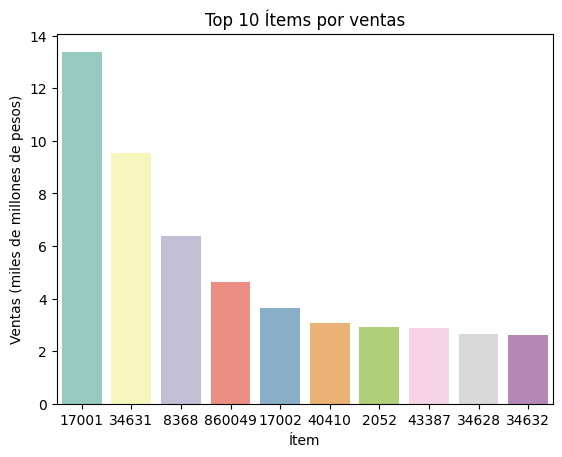

In [43]:
fig, ax = plt.subplots()

# Crear el gráfico de barras utilizando Seaborn
sns.barplot(x='Item', y='Valor bruto', data=top_10_ventas, ax=ax, order=top_10_ventas['Item'], palette='Set3')

# Ajustar las etiquetas de los ejes y el título de la gráfica
ax.set_xlabel('Ítem')
ax.set_ylabel('Ventas (miles de millones de pesos)')
ax.set_title('Top 10 Ítems por ventas')

# Formatear el eje y en miles de millones de pesos
formatter = FuncFormatter(lambda x, _: f'{int(x/1e9):,}')
ax.yaxis.set_major_formatter(formatter)

# MODELOS MACHINE LEARNING

##MODELOS ARIMA

### ARIMA 34631

In [162]:
# Organizar como serie de tiempo
item_34631 = pedidos_final.loc[pedidos_final['Item'] == 34631, ['Fecha', 'Cant. total']]
item_34631 = item_34631.sort_values('Fecha')
item_34631 = item_34631.groupby(pd.Grouper(key='Fecha', freq='M')).sum().reset_index()
item_34631

,Fecha,Cant. total
0,2019-01-31,9290
1,2019-02-28,6010
2,2019-03-31,7179
3,2019-04-30,0
4,2019-05-31,6330
5,2019-06-30,9878
6,2019-07-31,5196
7,2019-08-31,36596
8,2019-09-30,9835
9,2019-10-31,11571


In [163]:
item_34631.describe()

,Cant. total
count,51.000000
mean,10192.352941
std,7573.151653
min,0.000000
25%,5930.000000
50%,8448.000000
75%,12440.500000
max,36596.000000


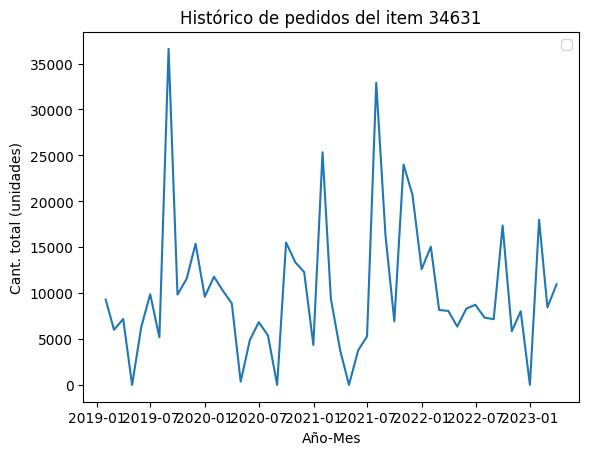

In [45]:
# Crear una figura y un eje
fig, ax = plt.subplots()

# Graficar los datos reales con leyenda
ax.plot(item_34631['Fecha'], item_34631['Cant. total'])

# Personalizar el gráfico
ax.set_xlabel('Año-Mes')
ax.set_ylabel('Cant. total (unidades)')
ax.set_title('Histórico de pedidos del item 34631')
ax.legend()

# Mostrar el gráfico
plt.show()

In [164]:
#Fecha como índice
data_34631 = item_34631.set_index('Fecha')

In [47]:
# Dividir los datos en conjunto de entrenamiento y prueba (80%-20%)
train_data = data_34631.loc['2019-01-31':'2022-09-30']
test_data = data_34631.loc['2022-10-31':'2023-03-31']

In [48]:
p = range(0, 3)  # Rango de valores para el parámetro p (orden de autorregresión)
d = range(0, 3)  # Rango de valores para el parámetro d (orden de diferenciación)
q = range(0, 3)  # Rango de valores para el parámetro q (orden de promedio móvil)

In [49]:
combinaciones = list(itertools.product(p, d, q))

In [50]:
#Búsqueda de hiperparametros para optimizar el modelo
mejor_mae = np.inf
mejores_parametros = None

for combinacion in combinaciones:

    modelo = ARIMA(train_data, order=combinacion)
    modelo_fit = modelo.fit()
    prediccion = modelo_fit.predict(start=len(train_data), end=len(train_data) + len(test_data)-1)
    prediccion = prediccion.round().astype(int)
    mae = mean_absolute_error(test_data, prediccion)
    mape = mean_absolute_percentage_error(prediccion, test_data)

    if mae < mejor_mae:
        mejor_prediccion = prediccion
        mejor_mae = mae
        mejor_mape = mape
        mejores_parametros = combinacion

In [51]:
# Obtener el resumen del modelo ARIMA
modelo = ARIMA(train_data, order=(2, 0 ,2))
modelo_fit = modelo.fit()
print(modelo_fit.summary())

                               SARIMAX Results                                
Dep. Variable:            Cant. total   No. Observations:                   45
Model:                 ARIMA(2, 0, 2)   Log Likelihood                -464.559
Date:                Fri, 23 Jun 2023   AIC                            941.118
Time:                        19:01:19   BIC                            951.958
Sample:                    01-31-2019   HQIC                           945.159
                         - 09-30-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.054e+04    574.515     18.353      0.000    9418.265    1.17e+04
ar.L1          1.5926      0.491      3.242      0.001       0.630       2.556
ar.L2         -0.6813      0.395     -1.726      0.0

In [52]:
print("Mejores parámetros: ", mejores_parametros)
print("Mejores pronósticos:\n", mejor_prediccion)
print("Mejor MAE: ", mejor_mae)
print("Mejor MAPE: ", mejor_mape)

Mejores parámetros:  (2, 0, 2)
Mejores pronósticos:
 2022-10-31    9528
2022-11-30    9331
2022-12-31    9304
2023-01-31    9396
2023-02-28    9560
2023-03-31    9759
Freq: M, Name: predicted_mean, dtype: int64
Mejor MAE:  4200.5
Mejor MAPE:  0.44680687982681433


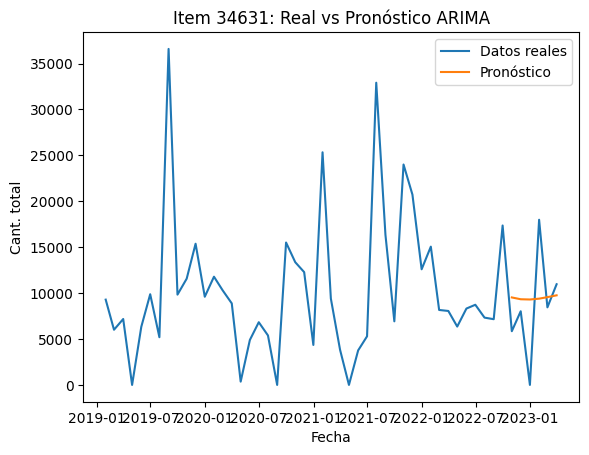

In [53]:
# Crear una figura y un eje
fig, ax = plt.subplots()

# Graficar los datos reales
plt.plot(item_34631['Fecha'], item_34631['Cant. total'], label='Datos reales')

# Graficar los pronósticos
plt.plot(mejor_prediccion, label='Pronóstico')

# Personalizar el gráfico
ax.set_xlabel('Fecha')
ax.set_ylabel('Cant. total')
ax.set_title('Item 34631: Real vs Pronóstico ARIMA')
ax.legend()

# Mostrar el gráfico
plt.show()

###ARIMA 17001

In [167]:
# Organizar como serie de tiempo
item_17001 = pedidos_final.loc[pedidos_final['Item'] == 17001, ['Fecha', 'Cant. total']]
item_17001 = item_17001.sort_values('Fecha')
item_17001 = item_17001.groupby(pd.Grouper(key='Fecha', freq='M')).sum().reset_index()
item_17001

,Fecha,Cant. total
0,2019-01-31,15876
1,2019-02-28,23108
2,2019-03-31,21200
3,2019-04-30,0
4,2019-05-31,19470
5,2019-06-30,23716
6,2019-07-31,17404
7,2019-08-31,52314
8,2019-09-30,24480
9,2019-10-31,19652


In [168]:
item_17001.describe()

,Cant. total
count,51.000000
mean,23619.313725
std,13360.735726
min,0.000000
25%,17601.000000
50%,21560.000000
75%,28914.500000
max,64370.000000


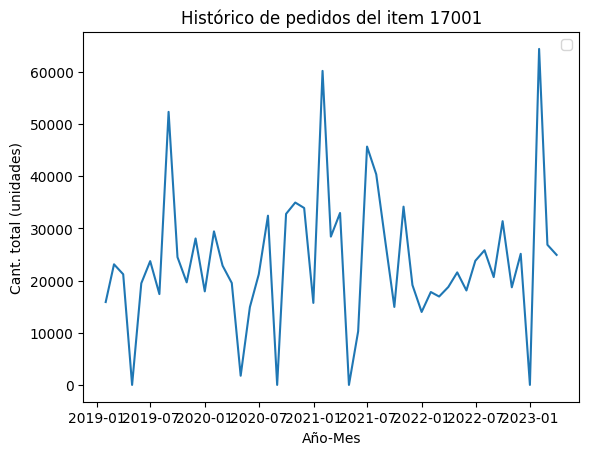

In [55]:
# Crear una figura y un eje
fig, ax = plt.subplots()

# Graficar los datos reales con leyenda
ax.plot(item_17001['Fecha'], item_17001['Cant. total'])

# Personalizar el gráfico
ax.set_xlabel('Año-Mes')
ax.set_ylabel('Cant. total (unidades)')
ax.set_title('Histórico de pedidos del item 17001')
ax.legend()

# Mostrar el gráfico
plt.show()

In [169]:
#Fecha como índice
data_17001 = item_17001.set_index('Fecha')

In [57]:
# Dividir los datos en conjunto de entrenamiento y prueba (80%-20%)
train_data = data_17001.loc['2019-01-31':'2022-09-30']
test_data = data_17001.loc['2022-10-31':'2023-03-31']

In [58]:
p = range(0, 3)  # Rango de valores para el parámetro p (orden de autorregresión)
d = range(0, 3)  # Rango de valores para el parámetro d (orden de diferenciación)
q = range(0, 3)  # Rango de valores para el parámetro q (orden de promedio móvil)

In [59]:
combinaciones = list(itertools.product(p, d, q))

In [60]:
#Búsqueda de hiperparametros para optimizar el modelo
mejor_mae = np.inf
mejores_parametros = None

for combinacion in combinaciones:

    modelo = ARIMA(train_data, order=combinacion)
    modelo_fit = modelo.fit()
    prediccion = modelo_fit.predict(start=len(train_data), end=len(train_data) + len(test_data) - 1)
    prediccion = prediccion.round().astype(int)
    mae = mean_absolute_error(test_data, prediccion)
    mape = mean_absolute_percentage_error(prediccion, test_data)

    if mae < mejor_mae:
        mejor_prediccion = prediccion
        mejor_mae = mae
        mejor_mape = mape
        mejores_parametros = combinacion

In [61]:
# Obtener el resumen del modelo ARIMA
modelo = ARIMA(train_data, order=(1, 1 ,2))
modelo_fit = modelo.fit()
print(modelo_fit.summary())

                               SARIMAX Results                                
Dep. Variable:            Cant. total   No. Observations:                   45
Model:                 ARIMA(1, 1, 2)   Log Likelihood                -479.668
Date:                Fri, 23 Jun 2023   AIC                            967.336
Time:                        19:01:23   BIC                            974.473
Sample:                    01-31-2019   HQIC                           969.983
                         - 09-30-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9966      0.271     -3.678      0.000      -1.528      -0.465
ma.L1          0.0176      0.528      0.033      0.973      -1.017       1.052
ma.L2         -0.9611      0.460     -2.091      0.0

In [62]:
print("Mejores parámetros: ", mejores_parametros)
print("Mejores pronósticos:\n", mejor_prediccion)
print("Mejor MAE: ", mejor_mae)
print("Mejor MAPE: ", mejor_mape)

Mejores parámetros:  (1, 1, 2)
Mejores pronósticos:
 2022-10-31    21984
2022-11-30    23846
2022-12-31    21990
2023-01-31    23839
2023-02-28    21997
2023-03-31    23833
Freq: M, Name: predicted_mean, dtype: int64
Mejor MAE:  12166.833333333334
Mejor MAPE:  0.5280799300870007


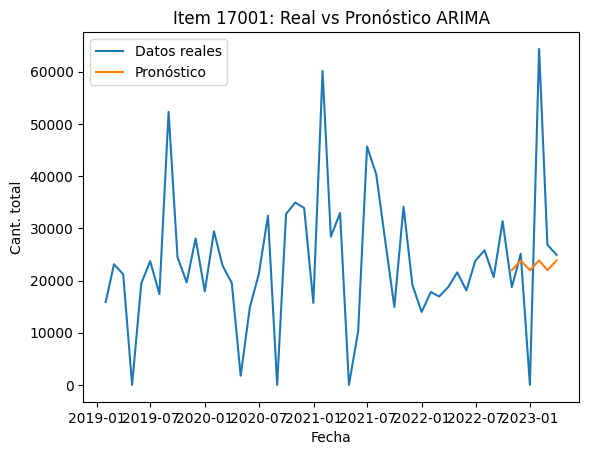

In [63]:
# Crear una figura y un eje
fig, ax = plt.subplots()

# Graficar los datos reales
plt.plot(item_17001['Fecha'], item_17001['Cant. total'], label='Datos reales')

# Graficar los pronósticos
plt.plot(mejor_prediccion, label='Pronóstico')

# Personalizar el gráfico
ax.set_xlabel('Fecha')
ax.set_ylabel('Cant. total')
ax.set_title('Item 17001: Real vs Pronóstico ARIMA')
ax.legend()

# Mostrar el gráfico
plt.show()

### ARIMA 43387

In [170]:
# Organizar como serie de tiempo
item_43387 = pedidos_final.loc[pedidos_final['Item'] == 43387, ['Fecha', 'Cant. total']]
item_43387 = item_43387.sort_values('Fecha')
item_43387 = item_43387.groupby(pd.Grouper(key='Fecha', freq='M')).sum().reset_index()
item_43387

,Fecha,Cant. total
0,2020-09-30,654
1,2020-10-31,240
2,2020-11-30,180
3,2020-12-31,57
4,2021-01-31,165
5,2021-02-28,230
6,2021-03-31,111
7,2021-04-30,0
8,2021-05-31,152
9,2021-06-30,329


In [171]:
item_43387.describe()

,Cant. total
count,31.000000
mean,209.419355
std,158.323461
min,0.000000
25%,111.000000
50%,165.000000
75%,284.000000
max,654.000000


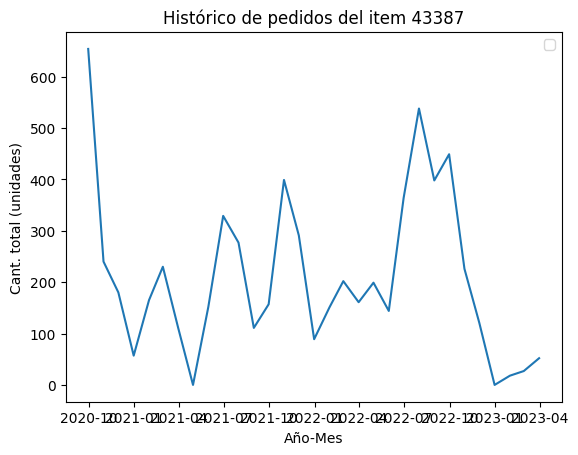

In [65]:
# Crear una figura y un eje
fig, ax = plt.subplots()

# Graficar los datos reales con leyenda
ax.plot(item_43387['Fecha'], item_43387['Cant. total'])

# Personalizar el gráfico
ax.set_xlabel('Año-Mes')
ax.set_ylabel('Cant. total (unidades)')
ax.set_title('Histórico de pedidos del item 43387')
ax.legend()

# Mostrar el gráfico
plt.show()

In [172]:
#Fecha como índice
data_43387 = item_43387.set_index('Fecha')

In [68]:
# Dividir los datos en conjunto de entrenamiento y prueba (80%-20%)
train_data = data_43387.loc['2019-01-31':'2022-09-30']
test_data = data_43387.loc['2022-10-31':'2023-03-31']

In [69]:
# Construir el modelo
modelo = ARIMA(train_data, order=(1, 1, 1))
modelo_fit = modelo.fit()
prediccion = modelo_fit.predict(start=len(train_data), end=len(train_data) + len(test_data) - 1)
prediccion = prediccion.round().astype(int)

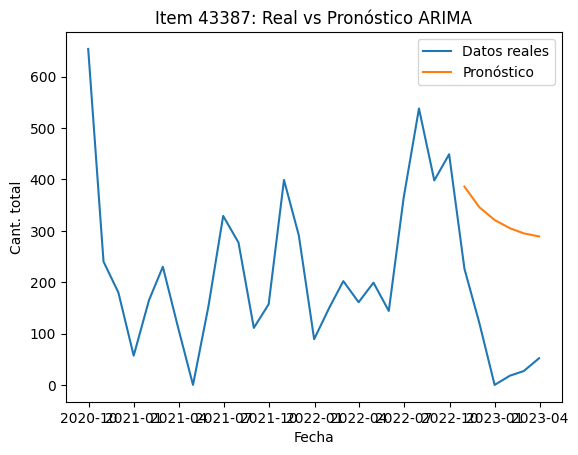

In [70]:
# Crear una figura y un eje
fig, ax = plt.subplots()

# Graficar los datos reales
plt.plot(item_43387['Fecha'], item_43387['Cant. total'], label='Datos reales')

# Graficar los pronósticos
plt.plot(prediccion, label='Pronóstico')

# Personalizar el gráfico
ax.set_xlabel('Fecha')
ax.set_ylabel('Cant. total')
ax.set_title('Item 43387: Real vs Pronóstico ARIMA')
ax.legend()

# Mostrar el gráfico
plt.show()



TUNING O AJUSTE DEL MODELO

In [71]:
p = range(0, 3)  # Rango de valores para el parámetro p (orden de autorregresión)
d = range(0, 3)  # Rango de valores para el parámetro d (orden de diferenciación)
q = range(0, 3)  # Rango de valores para el parámetro q (orden de promedio móvil)

In [72]:
combinaciones = list(itertools.product(p, d, q))

In [73]:
mejor_mae = np.inf
mejores_parametros = None

for combinacion in combinaciones:

    modelo = ARIMA(train_data, order=combinacion)
    modelo_fit = modelo.fit()
    prediccion = modelo_fit.predict(start=len(train_data), end=len(train_data) + len(test_data) - 1)
    prediccion = prediccion.round().astype(int)
    mae = mean_absolute_error(test_data, prediccion)
    mape = mean_absolute_percentage_error(prediccion, test_data)

    if mae < mejor_mae:
        mejor_prediccion = prediccion
        mejor_mae = mae
        mejor_mape = mape
        mejores_parametros = combinacion

In [74]:
# Obtener el resumen del modelo ARIMA
modelo = ARIMA(train_data, order=(2, 0 ,2))
modelo_fit = modelo.fit()
print(modelo_fit.summary())

                               SARIMAX Results                                
Dep. Variable:            Cant. total   No. Observations:                   25
Model:                 ARIMA(2, 0, 2)   Log Likelihood                -156.454
Date:                Fri, 23 Jun 2023   AIC                            324.907
Time:                        19:01:30   BIC                            332.221
Sample:                    09-30-2020   HQIC                           326.936
                         - 09-30-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        242.2190     31.359      7.724      0.000     180.756     303.682
ar.L1          0.9510      0.337      2.825      0.005       0.291       1.611
ar.L2         -0.1580      0.319     -0.495      0.6

In [75]:
print("Mejores parámetros: ", mejores_parametros)
print("Mejores pronósticos:\n", mejor_prediccion)
print("Mejor MAE: ", mejor_mae)
print("Mejor MAPE: ", mejor_mape)

Mejores parámetros:  (2, 0, 2)
Mejores pronósticos:
 2022-10-31    372
2022-11-30    189
2022-12-31    171
2023-01-31    183
2023-02-28    197
2023-03-31    209
Freq: M, Name: predicted_mean, dtype: int64
Mejor MAE:  146.16666666666666
Mejor MAPE:  0.7113401928359294


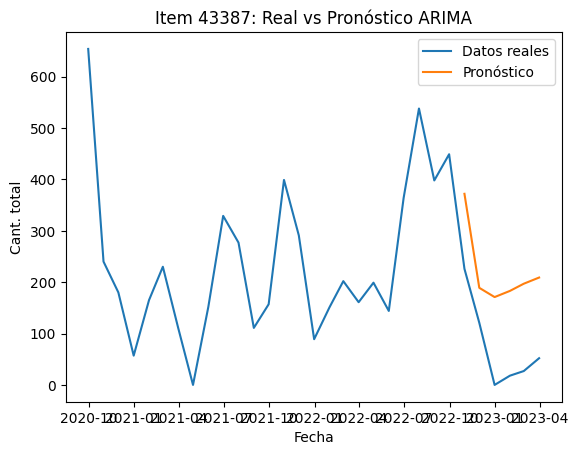

In [76]:
# Crear una figura y un eje
fig, ax = plt.subplots()

# Graficar los datos reales
plt.plot(item_43387['Fecha'], item_43387['Cant. total'], label='Datos reales')

# Graficar los pronósticos
plt.plot(mejor_prediccion, label='Pronóstico')

# Personalizar el gráfico
ax.set_xlabel('Fecha')
ax.set_ylabel('Cant. total')
ax.set_title('Item 43387: Real vs Pronóstico ARIMA')
ax.legend()

# Mostrar el gráfico
plt.show()

##MODELOS DE REGRESIÓN

###REGRESIÓN 34631

In [77]:
# Organizar datos
item_34631 = pedidos_final.loc[pedidos_final['Item'] == 34631, ['Fecha', 'Cant. total']]
item_34631 = item_34631.sort_values('Fecha')
item_34631 = item_34631.groupby(pd.Grouper(key='Fecha', freq='M')).sum().reset_index()
item_34631['Año'] = item_34631['Fecha'].dt.year
item_34631['Mes'] = item_34631['Fecha'].dt.month
nuevo_orden = ['Año', 'Mes', 'Cant. total', 'Fecha']
item_34631 = item_34631[nuevo_orden]
item_34631.drop('Fecha', axis=1, inplace=True)
item_34631

,Año,Mes,Cant. total
0,2019,1,9290
1,2019,2,6010
2,2019,3,7179
3,2019,4,0
4,2019,5,6330
5,2019,6,9878
6,2019,7,5196
7,2019,8,36596
8,2019,9,9835
9,2019,10,11571


In [78]:
#Divide los datos en características (X) y variable objetivo (y)
X = item_34631.iloc[:, :-1].values  # Características
y = item_34631.iloc[:, -1].values  # Variable objetivo

In [79]:
#Divide los datos en conjuntos de entrenamiento y prueba
X_train = X[:45]
X_test = X[-6:]
y_train = y[:45]
y_test = y[-6:]

In [80]:
#Búsqueda de hiperparametros para optimizar el modelo
best_degree = None
best_mae = float('inf')

for degree in range(1, 11):  # Itera sobre los grados del polinomio del 1 al 10 (puedes ajustar el rango según tus necesidades)
    # Transforma las características en características polinómicas
    polynomial_features = PolynomialFeatures(degree=degree)
    X_train_poly = polynomial_features.fit_transform(X_train)
    X_test_poly = polynomial_features.transform(X_test)

    # Entrena un modelo de regresión lineal con las características polinómicas
    model = LinearRegression()
    model.fit(X_train_poly, y_train)

    # Realiza predicciones en el conjunto de prueba y calcula el MAE
    y_pred = model.predict(X_test_poly)
    y_pred = y_pred.round().astype(int)
    mae = mean_absolute_error(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_pred, y_test)

    # Actualiza el mejor modelo si se encuentra un MAE más bajo
    if mae < best_mae:
        best_mae = mae
        best_mape = mape
        mejor_prediccion = y_pred
        best_degree = degree

In [81]:
print("Mejor grado del polinomio: ", best_degree)
print("Mejores pronósticos:\n", mejor_prediccion)
print("Mejor MAE: ", best_mae)
print("Mejor MAPE: ", best_mape)

Mejor grado del polinomio:  1
Mejores pronósticos:
 [13421 13961 14501  9162  9701 10241]
Mejor MAE:  6469.333333333333
Mejor MAPE:  0.52549075394111


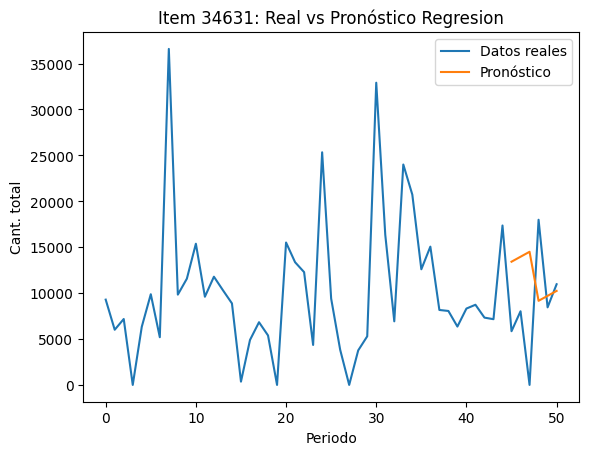

In [82]:
# Crear una figura y un eje
fig, ax = plt.subplots()
axis = [45, 46, 47, 48, 49, 50]

# Graficar los datos reales
plt.plot(item_34631['Cant. total'], label='Datos reales')

# Graficar los pronósticos
plt.plot(axis,mejor_prediccion, label='Pronóstico')

# Personalizar el gráfico
ax.set_xlabel('Periodo')
ax.set_ylabel('Cant. total')
ax.set_title('Item 34631: Real vs Pronóstico Regresion')
ax.legend()

# Mostrar el gráfico
plt.show()

###REGRESIÓN 17001

In [83]:
# Organizar datos
item_17001 = pedidos_final.loc[pedidos_final['Item'] == 17001, ['Fecha', 'Cant. total']]
item_17001 = item_17001.sort_values('Fecha')
item_17001 = item_17001.groupby(pd.Grouper(key='Fecha', freq='M')).sum().reset_index()
item_17001['Año'] = item_17001['Fecha'].dt.year
item_17001['Mes'] = item_17001['Fecha'].dt.month
nuevo_orden = ['Año', 'Mes', 'Cant. total', 'Fecha']
item_17001 = item_17001[nuevo_orden]
item_17001.drop('Fecha', axis=1, inplace=True)

In [84]:
#Divide los datos en características (X) y variable objetivo (y)
X = item_17001.iloc[:, :-1].values  # Características
y = item_17001.iloc[:, -1].values  # Variable objetivo

In [85]:
#Divide los datos en conjuntos de entrenamiento y prueba
X_train = X[:45]
X_test = X[-6:]
y_train = y[:45]
y_test = y[-6:]

In [86]:
#Búsqueda de hiperparametros para optimizar el modelo
best_degree = None
best_mae = float('inf')

for degree in range(1, 11):  # Itera sobre los grados del polinomio del 1 al 10 (puedes ajustar el rango según tus necesidades)
    # Transforma las características en características polinómicas
    polynomial_features = PolynomialFeatures(degree=degree)
    X_train_poly = polynomial_features.fit_transform(X_train)
    X_test_poly = polynomial_features.transform(X_test)

    # Entrena un modelo de regresión lineal con las características polinómicas
    model = LinearRegression()
    model.fit(X_train_poly, y_train)

    # Realiza predicciones en el conjunto de prueba y calcula el MAE
    y_pred = model.predict(X_test_poly)
    y_pred = y_pred.round().astype(int)
    mae = mean_absolute_error(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_pred, y_test)

    # Actualiza el mejor modelo si se encuentra un MAE más bajo
    if mae < best_mae:
        best_mae = mae
        best_mape = mape
        mejor_prediccion = y_pred
        best_degree = degree


In [87]:
print("Mejor grado del polinomio: ", best_degree)
print("Mejores pronósticos:\n", mejor_prediccion)
print("Mejor MAE: ", best_mae)
print("Mejor MAPE: ", best_mape)

Mejor grado del polinomio:  1
Mejores pronósticos:
 [25293 25517 25740 24051 24274 24498]
Mejor MAE:  12673.5
Mejor MAPE:  0.512618704515304


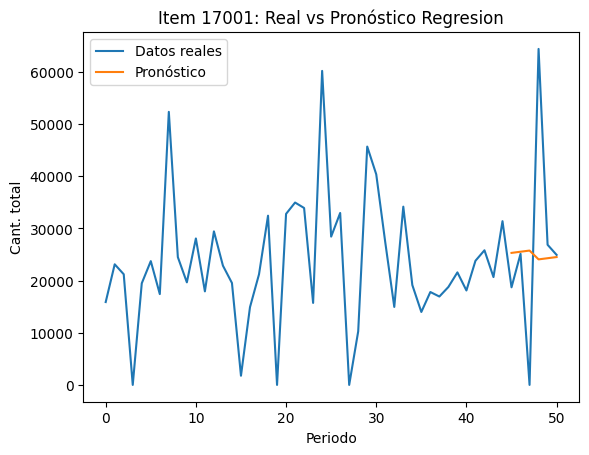

In [88]:
# Crear una figura y un eje
fig, ax = plt.subplots()
axis = [45, 46, 47, 48, 49, 50]

# Graficar los datos reales
plt.plot(item_17001['Cant. total'], label='Datos reales')

# Graficar los pronósticos
plt.plot(axis,mejor_prediccion, label='Pronóstico')

# Personalizar el gráfico
ax.set_xlabel('Periodo')
ax.set_ylabel('Cant. total')
ax.set_title('Item 17001: Real vs Pronóstico Regresion')
ax.legend()

# Mostrar el gráfico
plt.show()

###REGRESIÓN 43387

In [89]:
# Organizar datos
item_43387 = pedidos_final.loc[pedidos_final['Item'] == 43387, ['Fecha', 'Cant. total']]
item_43387 = item_43387.sort_values('Fecha')
item_43387 = item_43387.groupby(pd.Grouper(key='Fecha', freq='M')).sum().reset_index()
item_43387['Año'] = item_43387['Fecha'].dt.year
item_43387['Mes'] = item_43387['Fecha'].dt.month
nuevo_orden = ['Año', 'Mes', 'Cant. total', 'Fecha']
item_43387 = item_43387[nuevo_orden]
item_43387.drop('Fecha', axis=1, inplace=True)
item_43387

,Año,Mes,Cant. total
0,2020,9,654
1,2020,10,240
2,2020,11,180
3,2020,12,57
4,2021,1,165
5,2021,2,230
6,2021,3,111
7,2021,4,0
8,2021,5,152
9,2021,6,329


In [90]:
#Divide los datos en características (X) y variable objetivo (y)
X = item_43387.iloc[:, :-1].values  # Características
y = item_43387.iloc[:, -1].values  # Variable objetivo

In [91]:
#Divide los datos en conjuntos de entrenamiento y prueba
X_train = X[:25]
X_test = X[-6:]
y_train = y[:25]
y_test = y[-6:]

In [92]:
#Búsqueda de hiperparametros para optimizar el modelo
best_degree = None
best_mae = float('inf')

for degree in range(1, 11):  # Itera sobre los grados del polinomio del 1 al 10 (puedes ajustar el rango según tus necesidades)
    # Transforma las características en características polinómicas
    polynomial_features = PolynomialFeatures(degree=degree)
    X_train_poly = polynomial_features.fit_transform(X_train)
    X_test_poly = polynomial_features.transform(X_test)

    # Entrena un modelo de regresión lineal con las características polinómicas
    model = LinearRegression()
    model.fit(X_train_poly, y_train)

    # Realiza predicciones en el conjunto de prueba y calcula el MAE
    y_pred = model.predict(X_test_poly)
    y_pred = y_pred.round().astype(int)
    mae = mean_absolute_error(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_pred, y_test)

    # Actualiza el mejor modelo si se encuentra un MAE más bajo
    if mae < best_mae:
        best_mae = mae
        best_mape = mape
        mejor_prediccion = y_pred
        best_degree = degree

In [93]:
print("Mejor grado del polinomio: ", best_degree)
print("Mejores pronósticos:\n", mejor_prediccion)
print("Mejor MAE: ", best_mae)
print("Mejor MAPE: ", best_mape)

Mejor grado del polinomio:  1
Mejores pronósticos:
 [350 366 383 263 280 297]
Mejor MAE:  249.16666666666666
Mejor MAPE:  0.780621801706335


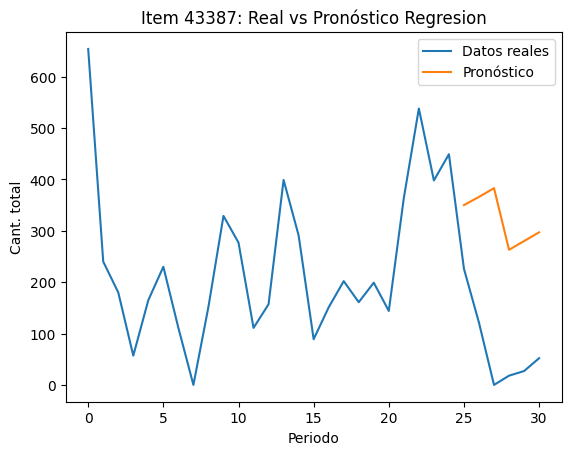

In [94]:
# Crear una figura y un eje
fig, ax = plt.subplots()
axis = [25, 26, 27, 28, 29, 30]

# Graficar los datos reales
plt.plot(item_43387['Cant. total'], label='Datos reales')

# Graficar los pronósticos
plt.plot(axis,mejor_prediccion, label='Pronóstico')

# Personalizar el gráfico
ax.set_xlabel('Periodo')
ax.set_ylabel('Cant. total')
ax.set_title('Item 43387: Real vs Pronóstico Regresion')
ax.legend()

# Mostrar el gráfico
plt.show()

## MODELOS DE REDES NEURONALES

In [95]:
# Establecer semillas para reproducibilidad
seed_value = 0

# Establecer la semilla para NumPy
np.random.seed(seed_value)

# Establecer la semilla para Python random
random.seed(seed_value)

# Establecer la semilla para TensorFlow
tf.random.set_seed(seed_value)

### REDES 34631

In [96]:
# Organizar como serie de tiempo
item_34631 = pedidos_final.loc[pedidos_final['Item'] == 34631, ['Fecha', 'Cant. total']]
item_34631 = item_34631.sort_values('Fecha')
item_34631 = item_34631.groupby(pd.Grouper(key='Fecha', freq='M')).sum().reset_index()

In [97]:
# Paso1: Preparar datos
data_34631 = item_34631['Cant. total']
serie_tiempo = data_34631.tolist()

In [98]:
# Paso 2: Crear datos supervisados
def crear_datos_supervisados(serie, ventana):
    datos_X, datos_y = [], []
    for i in range(len(serie) - ventana):
        datos_X.append(serie[i:i+ventana])
        datos_y.append(serie[i+ventana])
    return np.array(datos_X), np.array(datos_y)

tam_ventana = 24  # Ajustar el tamaño de la ventana para que coincida con el número de características
datos_X, datos_y = crear_datos_supervisados(serie_tiempo, tam_ventana)

In [99]:
# Paso 3: Normalizar los datos
scaler_X = MinMaxScaler(feature_range=(0, 1))
datos_X = scaler_X.fit_transform(datos_X)

scaler_y = MinMaxScaler(feature_range=(0, 1))
datos_y = scaler_y.fit_transform(datos_y.reshape(-1, 1))

In [100]:
# Paso 4: Dividir los datos en conjuntos de entrenamiento y prueba
ratio_entrenamiento = 0.8
num_muestras_entrenamiento = int(len(datos_X) * ratio_entrenamiento)

X_entrenamiento = datos_X[:num_muestras_entrenamiento]
y_entrenamiento = datos_y[:num_muestras_entrenamiento]
X_prueba = datos_X[num_muestras_entrenamiento:]
y_prueba = datos_y[num_muestras_entrenamiento:]

In [101]:
#Establecer semilla para reproducibilidad
np.random.seed(0)

In [103]:
#B) Paso 5: Definir y entrenar el modelo
model = Sequential()
#model.add(LSTM(64, input_shape=(1, 1)))
model.add(LSTM(64, activation='relu', input_dim=tam_ventana))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_absolute_error')
modelo.fit(X_entrenamiento, y_entrenamiento, epochs=100, batch_size=1, verbose=0)

In [104]:
# Paso 6: Realizar la predicción
ultimos_periodos_conocidos = serie_tiempo[-tam_ventana:]
ultimos_periodos_conocidos = scaler_X.transform(np.array(ultimos_periodos_conocidos).reshape(1, -1))

In [105]:
prediccion = []
for _ in range(6):
    valor_predicho = modelo.predict(ultimos_periodos_conocidos.reshape(1, tam_ventana))
    prediccion.append(valor_predicho[0, 0])
    ultimos_periodos_conocidos = np.append(ultimos_periodos_conocidos[:, 1:], valor_predicho, axis=1)

prediccion = scaler_y.inverse_transform(np.array(prediccion).reshape(-1, 1))
prediccion = prediccion.astype(np.int)

1/1 [==============================] - 0s 25ms/step


In [106]:
# Calcular error
y_prueba_orig = scaler_y.inverse_transform(y_prueba)
mae = mean_absolute_error(y_prueba_orig, prediccion)
mape = mean_absolute_percentage_error(prediccion, y_prueba_orig)

In [107]:
print("Mejores pronósticos:\n", prediccion.flatten())
print("Mejor MAE: ", mae)
print("Mejor MAPE: ", mape)

Mejores pronósticos:
 [ 3421  7711 22585 25611  9087 14762]
Mejor MAE:  6230.333333333333
Mejor MAPE:  0.3959204005821229


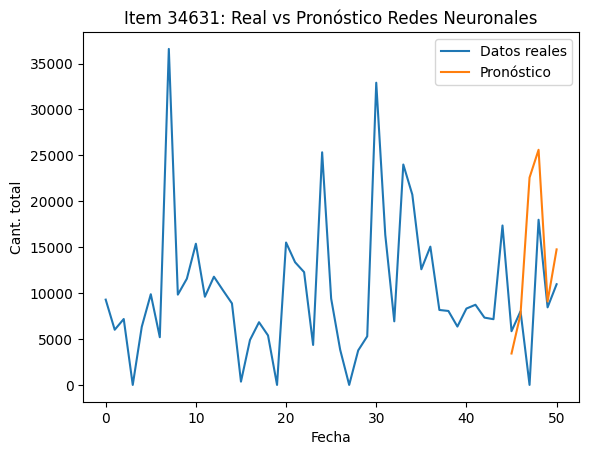

In [108]:
# Visualización de resultados
plt.plot(data_34631.index, data_34631, label='Datos reales')
plt.plot(data_34631.index[45:], prediccion, label='Pronóstico')
plt.xlabel('Fecha')
plt.ylabel('Cant. total')
plt.title('Item 34631: Real vs Pronóstico Redes Neuronales')
plt.legend()
plt.show()

### REDES 17001

In [109]:
# Organizar como serie de tiempo
item_17001 = pedidos_final.loc[pedidos_final['Item'] == 17001, ['Fecha', 'Cant. total']]
item_17001 = item_17001.sort_values('Fecha')
item_17001 = item_17001.groupby(pd.Grouper(key='Fecha', freq='M')).sum().reset_index()

In [110]:
# Paso1: Preparar datos
data_17001 = item_17001['Cant. total']
serie_tiempo = data_17001.tolist()

In [111]:
# Paso 2: Crear datos supervisados
def crear_datos_supervisados(serie, ventana):
    datos_X, datos_y = [], []
    for i in range(len(serie) - ventana):
        datos_X.append(serie[i:i+ventana])
        datos_y.append(serie[i+ventana])
    return np.array(datos_X), np.array(datos_y)

tam_ventana = 24  # Ajustar el tamaño de la ventana para que coincida con el número de características
datos_X, datos_y = crear_datos_supervisados(serie_tiempo, tam_ventana)

In [112]:
# Paso 3: Normalizar los datos
scaler_X = MinMaxScaler(feature_range=(0, 1))
datos_X = scaler_X.fit_transform(datos_X)

scaler_y = MinMaxScaler(feature_range=(0, 1))
datos_y = scaler_y.fit_transform(datos_y.reshape(-1, 1))

In [113]:
# Paso 4: Dividir los datos en conjuntos de entrenamiento y prueba
ratio_entrenamiento = 0.8
num_muestras_entrenamiento = int(len(datos_X) * ratio_entrenamiento)

X_entrenamiento = datos_X[:num_muestras_entrenamiento]
y_entrenamiento = datos_y[:num_muestras_entrenamiento]
X_prueba = datos_X[num_muestras_entrenamiento:]
y_prueba = datos_y[num_muestras_entrenamiento:]

In [115]:
#B) Paso 5: Definir y entrenar el modelo
model = Sequential()
#model.add(LSTM(64, input_shape=(1, 1)))
model.add(LSTM(64, activation='relu', input_dim=tam_ventana))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_absolute_error')
modelo.fit(X_entrenamiento, y_entrenamiento, epochs=100, batch_size=1, verbose=0)

In [116]:
# Paso 6: Realizar la predicción
ultimos_periodos_conocidos = serie_tiempo[-tam_ventana:]
ultimos_periodos_conocidos = scaler_X.transform(np.array(ultimos_periodos_conocidos).reshape(1, -1))

In [117]:
prediccion = []
for _ in range(6):
    valor_predicho = modelo.predict(ultimos_periodos_conocidos.reshape(1, tam_ventana))
    prediccion.append(valor_predicho[0, 0])
    ultimos_periodos_conocidos = np.append(ultimos_periodos_conocidos[:, 1:], valor_predicho, axis=1)

prediccion = scaler_y.inverse_transform(np.array(prediccion).reshape(-1, 1))
prediccion = prediccion.astype(np.int)

1/1 [==============================] - 0s 37ms/step


In [118]:
# Calcular error
y_prueba_orig = scaler_y.inverse_transform(y_prueba)
mae = mean_absolute_error(y_prueba_orig, prediccion)
mape = mean_absolute_percentage_error(prediccion, y_prueba_orig)

In [119]:
print("Mejores pronósticos:\n", prediccion.flatten())
print("Mejor MAE: ", mae)
print("Mejor MAPE: ", mape)

Mejores pronósticos:
 [10379 40255 37231 24867 19126 33848]
Mejor MAE:  19476.666666666668
Mejor MAPE:  0.739063918529629


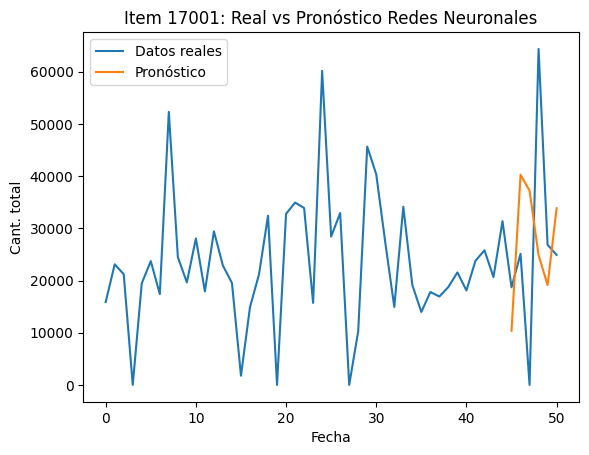

In [120]:
# Visualización de resultados
plt.plot(data_17001.index, data_17001, label='Datos reales')
plt.plot(data_17001.index[45:], prediccion, label='Pronóstico')
plt.xlabel('Fecha')
plt.ylabel('Cant. total')
plt.title('Item 17001: Real vs Pronóstico Redes Neuronales')
plt.legend()
plt.show()

### REDES 43387

In [121]:
# Organizar como serie de tiempo
item_43387 = pedidos_final.loc[pedidos_final['Item'] == 43387, ['Fecha', 'Cant. total']]
item_43387 = item_43387.sort_values('Fecha')
item_43387 = item_43387.groupby(pd.Grouper(key='Fecha', freq='M')).sum().reset_index()

In [122]:
# Paso1: Preparar datos
data_43387 = item_43387['Cant. total']
serie_tiempo = data_43387.tolist()

In [123]:
# Paso 2: Crear datos supervisados
def crear_datos_supervisados(serie, ventana):
    datos_X, datos_y = [], []
    for i in range(len(serie) - ventana):
        datos_X.append(serie[i:i+ventana])
        datos_y.append(serie[i+ventana])
    return np.array(datos_X), np.array(datos_y)

tam_ventana = 18  # Ajustar el tamaño de la ventana para que coincida con el número de características
datos_X, datos_y = crear_datos_supervisados(serie_tiempo, tam_ventana)

In [124]:
# Paso 3: Normalizar los datos
scaler_X = MinMaxScaler(feature_range=(0, 1))
datos_X = scaler_X.fit_transform(datos_X)

scaler_y = MinMaxScaler(feature_range=(0, 1))
datos_y = scaler_y.fit_transform(datos_y.reshape(-1, 1))

In [125]:
# Paso 4: Dividir los datos en conjuntos de entrenamiento y prueba
ratio_entrenamiento = 0.6
num_muestras_entrenamiento = int(len(datos_X) * ratio_entrenamiento)

X_entrenamiento = datos_X[:num_muestras_entrenamiento]
y_entrenamiento = datos_y[:num_muestras_entrenamiento]
X_prueba = datos_X[num_muestras_entrenamiento:]
y_prueba = datos_y[num_muestras_entrenamiento:]

In [126]:
#A) Paso 5: Definir y entrenar el modelo
modelo = Sequential()
modelo.add(Dense(64, activation='relu', input_dim=tam_ventana))
modelo.add(Dense(1))
modelo.compile(loss='mean_absolute_error', optimizer='adam')
modelo.fit(X_entrenamiento, y_entrenamiento, epochs=1000, batch_size=1, verbose=0)

In [127]:
# Paso 6: Realizar la predicción
ultimos_periodos_conocidos = serie_tiempo[-tam_ventana:]
ultimos_periodos_conocidos = scaler_X.transform(np.array(ultimos_periodos_conocidos).reshape(1, -1))

In [128]:
prediccion = []
for _ in range(6):
    valor_predicho = modelo.predict(ultimos_periodos_conocidos.reshape(1, tam_ventana))
    prediccion.append(valor_predicho[0, 0])
    ultimos_periodos_conocidos = np.append(ultimos_periodos_conocidos[:, 1:], valor_predicho, axis=1)

prediccion = scaler_y.inverse_transform(np.array(prediccion).reshape(-1, 1))
prediccion = prediccion.astype(np.int)

1/1 [==============================] - 0s 23ms/step


In [129]:
# Calcular error
y_prueba_orig = scaler_y.inverse_transform(y_prueba)
mae = mean_absolute_error(y_prueba_orig, prediccion)
mape = mean_absolute_percentage_error(prediccion, y_prueba_orig)

In [130]:
print("Mejores pronósticos:\n", prediccion.flatten())
print("Mejor MAE: ", mae)
print("Mejor MAPE: ", mape)

Mejores pronósticos:
 [278 192 427 458 545 548]
Mejor MAE:  334.0
Mejor MAPE:  0.7288514868304423


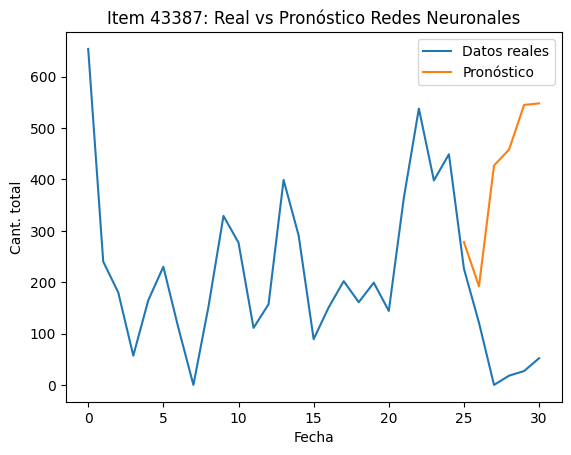

In [131]:
# Visualización de resultados
plt.plot(data_43387.index, data_43387, label='Datos reales')
plt.plot(data_43387.index[25:], prediccion, label='Pronóstico')
plt.xlabel('Fecha')
plt.ylabel('Cant. total')
plt.title('Item 43387: Real vs Pronóstico Redes Neuronales')
plt.legend()
plt.show()

##MODELOS RANDOM FOREST

### RANDOM 34631

In [132]:
#Preparación de los datos
item_34631 = pedidos_final.loc[pedidos_final['Item'] == 34631, ['Fecha', 'Cant. total']]
item_34631 = item_34631.sort_values('Fecha')
item_34631 = item_34631.groupby(pd.Grouper(key='Fecha', freq='M')).sum().reset_index()
item_34631['Año'] = item_34631['Fecha'].dt.year
item_34631['Mes'] = item_34631['Fecha'].dt.month
nuevo_orden = ['Año', 'Mes', 'Cant. total', 'Fecha']
item_34631 = item_34631[nuevo_orden]
item_34631.drop('Fecha', axis=1, inplace=True)

In [133]:
#Divide los datos en características (X) y variable objetivo (y)
X = item_34631.iloc[:, :-1].values  # Características
y = item_34631.iloc[:, -1].values  # Variable objetivo

In [134]:
#Divide los datos en conjuntos de entrenamiento y prueba
X_train = X[:45]
X_test = X[-6:]
y_train = y[:45]
y_test = y[-6:]

In [135]:
# Crea el modelo de Random Forest
model = RandomForestRegressor(random_state=42)

In [136]:
# Define los hiperparámetros a probar
param_grid = {
    'n_estimators': range(1, 101, 3)
}

In [137]:
# Utiliza GridSearchCV para buscar los mejores hiperparámetros
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_mean_absolute_error', cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid={'n_estimators': range(1, 101, 3)},
             scoring='neg_mean_absolute_error')

In [138]:
# Obtiene los resultados del grid search
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

print("Mejores hiperparámetros encontrados:")
print(best_params)

Mejores hiperparámetros encontrados:
{'n_estimators': 28}


In [139]:
# Realiza pronósticos en los datos de prueba utilizando el mejor modelo
y_pred = best_estimator.predict(X_test)
y_pred = y_pred.round().astype(int)

# Calcula el Error
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_pred, y_test)

In [140]:
print("Mejor estimador: ", best_params)
print("Mejores pronósticos:\n", y_pred)
print("Mejor MAE: ", mae)
print("Mejor MAPE: ", mape)

Mejor estimador:  {'n_estimators': 28}
Mejores pronósticos:
 [16210 15598 13733 15929  9577  7522]
Mejor MAE:  6383.666666666667
Mejor MAPE:  0.4716468422521174


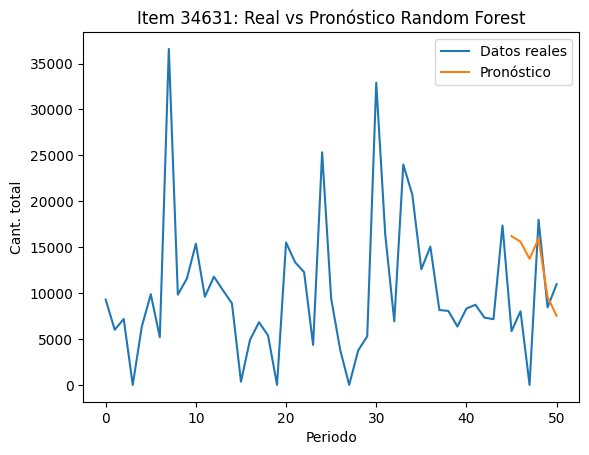

In [141]:
# Crear una figura y un eje
fig, ax = plt.subplots()

# Graficar los datos reales
plt.plot(item_34631.index,item_34631['Cant. total'], label='Datos reales')

# Graficar los pronósticos
plt.plot(item_34631.index[45:],y_pred, label='Pronóstico')

# Personalizar el gráfico
ax.set_xlabel('Periodo')
ax.set_ylabel('Cant. total')
ax.set_title('Item 34631: Real vs Pronóstico Random Forest')
ax.legend()

# Mostrar el gráfico
plt.show()

### RANDOM 17001

In [142]:
#Preparación de los datos
item_17001 = pedidos_final.loc[pedidos_final['Item'] == 17001, ['Fecha', 'Cant. total']]
item_17001 = item_17001.sort_values('Fecha')
item_17001 = item_17001.groupby(pd.Grouper(key='Fecha', freq='M')).sum().reset_index()
item_17001['Año'] = item_17001['Fecha'].dt.year
item_17001['Mes'] = item_17001['Fecha'].dt.month
nuevo_orden = ['Año', 'Mes', 'Cant. total', 'Fecha']
item_17001 = item_17001[nuevo_orden]
item_17001.drop('Fecha', axis=1, inplace=True)

In [143]:
#Divide los datos en características (X) y variable objetivo (y)
X = item_17001.iloc[:, :-1].values  # Características
y = item_17001.iloc[:, -1].values  # Variable objetivo

In [144]:
#Divide los datos en conjuntos de entrenamiento y prueba
X_train = X[:45]
X_test = X[-6:]
y_train = y[:45]
y_test = y[-6:]

In [145]:
# Define los hiperparámetros a probar
param_grid = {
    'n_estimators': range(1, 51, 2)
}

In [146]:
# Crea el modelo de Random Forest
model = RandomForestRegressor(random_state=42)

In [147]:
# Utiliza GridSearchCV para buscar los mejores hiperparámetros
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_mean_absolute_error', cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid={'n_estimators': range(1, 51, 2)},
             scoring='neg_mean_absolute_error')

In [148]:
# Obtiene los resultados del grid search
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

print("Mejores hiperparámetros encontrados:")
print(best_params)

Mejores hiperparámetros encontrados:
{'n_estimators': 9}


In [149]:
# Realiza pronósticos en los datos de prueba utilizando el mejor modelo
y_pred = best_estimator.predict(X_test)
y_pred = y_pred.round().astype(int)

# Calcula el Error
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_pred, y_test)

In [150]:
print("Mejor estimador: ", best_params)
print("Mejores pronósticos:\n", y_pred)
print("Mejor MAE: ", mae)
print("Mejor MAPE: ", mape)

Mejor estimador:  {'n_estimators': 9}
Mejores pronósticos:
 [26790 23665 16675 27020 22132 22849]
Mejor MAE:  11723.5
Mejor MAPE:  0.5081343766695205


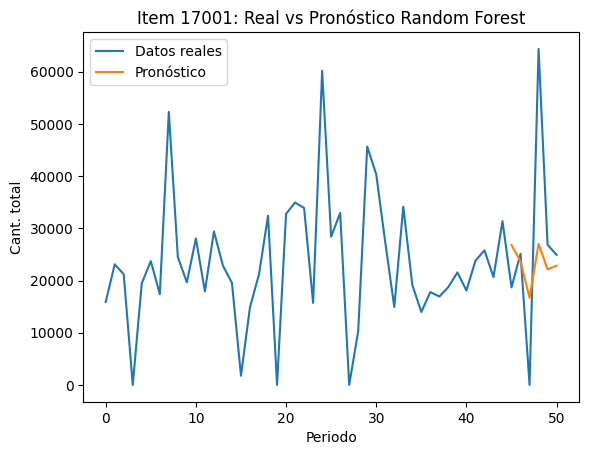

In [151]:
# Crear una figura y un eje
fig, ax = plt.subplots()

# Graficar los datos reales
plt.plot(item_17001.index,item_17001['Cant. total'], label='Datos reales')

# Graficar los pronósticos
plt.plot(item_17001.index[45:],y_pred, label='Pronóstico')

# Personalizar el gráfico
ax.set_xlabel('Periodo')
ax.set_ylabel('Cant. total')
ax.set_title('Item 17001: Real vs Pronóstico Random Forest')
ax.legend()

# Mostrar el gráfico
plt.show()

### RANDOM 43387

In [152]:
#Preparación de los datos
item_43387 = pedidos_final.loc[pedidos_final['Item'] == 43387, ['Fecha', 'Cant. total']]
item_43387 = item_43387.sort_values('Fecha')
item_43387 = item_43387.groupby(pd.Grouper(key='Fecha', freq='M')).sum().reset_index()
item_43387['Año'] = item_43387['Fecha'].dt.year
item_43387['Mes'] = item_43387['Fecha'].dt.month
nuevo_orden = ['Año', 'Mes', 'Cant. total', 'Fecha']
item_43387 = item_43387[nuevo_orden]
item_43387.drop('Fecha', axis=1, inplace=True)

In [153]:
#Divide los datos en características (X) y variable objetivo (y)
X = item_43387.iloc[:, :-1].values  # Características
y = item_43387.iloc[:, -1].values  # Variable objetivo

In [154]:
#Divide los datos en conjuntos de entrenamiento y prueba
X_train = X[:25]
X_test = X[-6:]
y_train = y[:25]
y_test = y[-6:]

In [155]:
# Define los hiperparámetros a probar
param_grid = {
    'n_estimators':  range(80, 151, 5)
}

In [156]:
# Crea el modelo de Random Forest
model = RandomForestRegressor(random_state=42)

In [157]:
# Utiliza GridSearchCV para buscar los mejores hiperparámetros
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_mean_absolute_error', cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid={'n_estimators': range(80, 151, 5)},
             scoring='neg_mean_absolute_error')

In [158]:
# Obtiene los resultados del grid search
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

print("Mejores hiperparámetros encontrados:")
print(best_params)

Mejores hiperparámetros encontrados:
{'n_estimators': 95}


In [159]:
# Realiza pronósticos en los datos de prueba utilizando el mejor modelo
y_pred = best_estimator.predict(X_test)
y_pred = y_pred.round().astype(int)

# Calcula el Error
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_pred, y_test)

In [160]:
print("Mejor estimador: ", best_params)
print("Mejores pronósticos:\n", y_pred)
print("Mejor MAE: ", mae)
print("Mejor MAPE: ", mape)

Mejor estimador:  {'n_estimators': 95}
Mejores pronósticos:
 [424 371 230 163 200 165]
Mejor MAE:  184.83333333333334
Mejor MAPE:  0.7633757694184248


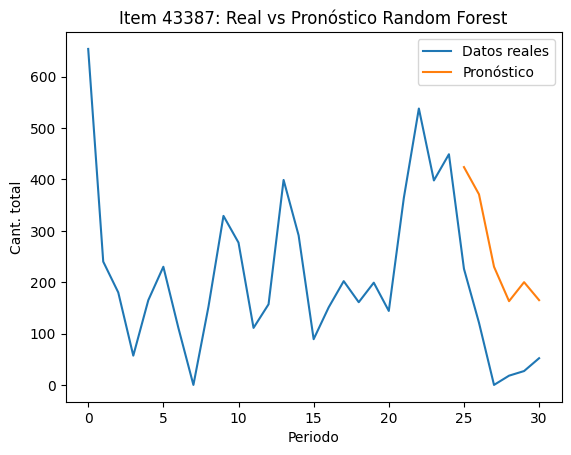

In [161]:
# Crear una figura y un eje
fig, ax = plt.subplots()

# Graficar los datos reales
plt.plot(item_43387.index,item_43387['Cant. total'], label='Datos reales')

# Graficar los pronósticos
plt.plot(item_43387.index[25:],y_pred, label='Pronóstico')

# Personalizar el gráfico
ax.set_xlabel('Periodo')
ax.set_ylabel('Cant. total')
ax.set_title('Item 43387: Real vs Pronóstico Random Forest')
ax.legend()

# Mostrar el gráfico
plt.show()